In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as solvers
%matplotlib widget

import atmosphere as atm
from EOMs import soyuz as soyuz

# Atmospheric Model Validation

For this project, we are leveraging the CIRA reference atmospheric model (which is accurate to about 180 km). This model uses a 7th order polynimial fit as follows:

$polyfn(h) = a0 + a1\bullet h + a2\bullet h^2 + a3\bullet h^3 + a4\bullet h^4 + a5\bullet h^5 + a6\bullet h^6 + a7\bullet h^7$

$\rho(h) = 10^{polyfn(h)}$

Refer to my code in atmosphere.py if you;re cusious exactly how this works

In [2]:
h_test = np.linspace(0,180,1000)
rho_test = atm.density(h_test)

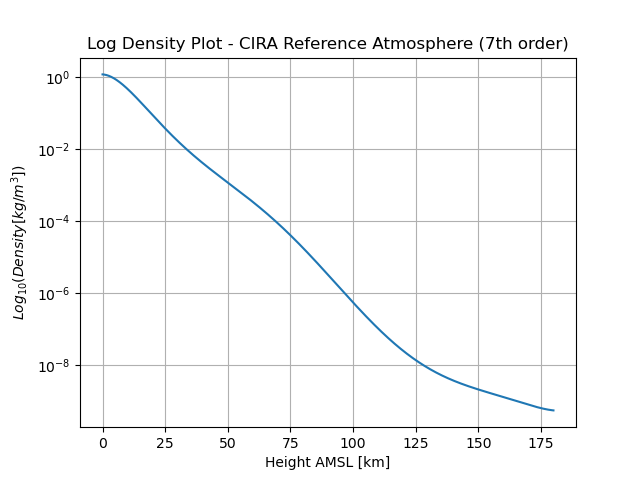

In [3]:
plt.figure()
plt.semilogy(h_test, rho_test)
plt.grid()
plt.xlabel('Height AMSL [km]')
plt.ylabel('$Log_{10}(Density [kg/m^3])$')
plt.title("Log Density Plot - CIRA Reference Atmosphere (7th order)")
plt.show()

# Soyuz Initial Conditions & Paremeters

The initial conditions for Soyuz's reentry are as follows:

In [4]:
entryAlt =  122 # Height of initial thermal interface (m)
fpa =  np.radians(-1.35) # Initial flight path angle of Soyuz (rad)
vi =  7870 # Initial velocity at thermal interface (m/s)

Below are some important parameters of the Soyuz crew capsule:

In [5]:
cd = 1.3 # Drag coeff at trim condition
ld = .25 # Lift to Drag Ratio of Spacecraft
Ac = (np.pi/4) * (2.2**2) # Capsule cross sectional area (m^2)
m = 2900 # descent module mass (kg)
theta0 = np.pi

vxi = np.cos(fpa)*vi
vyi = np.sin(fpa)*vi

# Simulation Parameters and Conditions

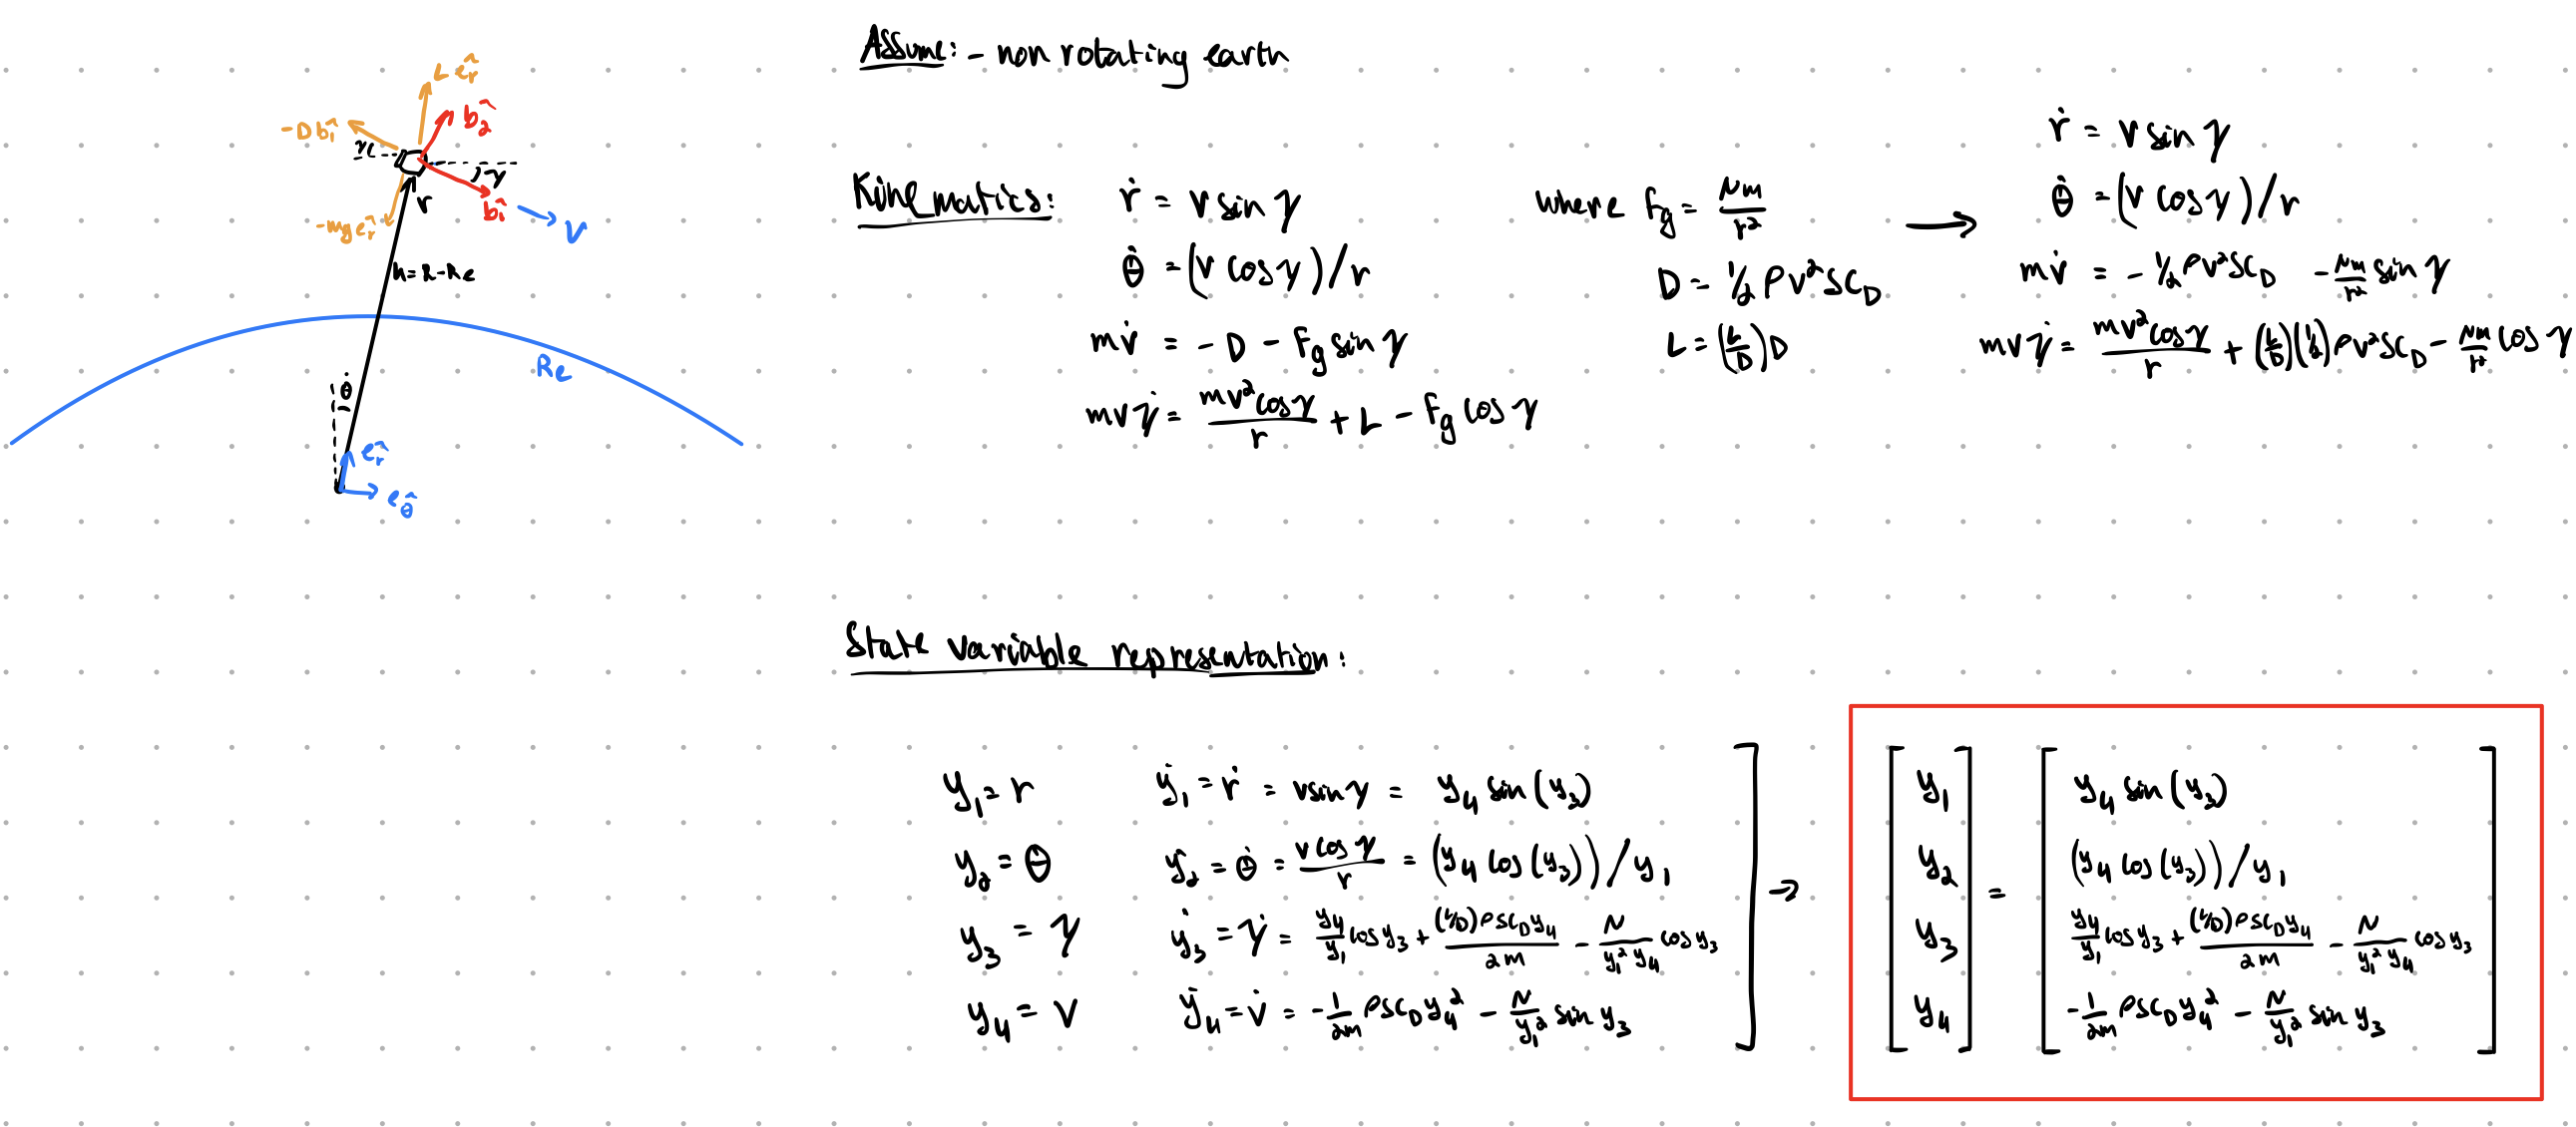

In [6]:
Re = 6376 # Radius of Earth (km)
mu = 3.986e5 # Gravitational Parameter of Earth
tf = 20*60 # Final time (sec)
t = np.linspace(0,tf, 10000) # Time array (sec)
stop_alt = 10 # stop at this altitude (km)

# Simulation

In [7]:
result = solvers.solve_ivp(soyuz, t_span = (0, tf), t_eval = t, y0 = (entryAlt+Re, theta0, fpa, vi/1000), rtol=1e-8, atol=1e-8, args = (cd, mu, ld, Re, m, Ac))

In [8]:
flight_t = result.t[(result.y[0]-Re) > stop_alt]
flight_R = result.y[0][(result.y[0]-Re) > stop_alt] - Re
flight_R2 = result.y[0][(result.y[0]-Re) > stop_alt]
flight_Theta = result.y[1][(result.y[0]-Re) > stop_alt]
flight_Gamma = result.y[2][(result.y[0]-Re) > stop_alt]
flight_V = result.y[3][(result.y[0]-Re) > stop_alt]

# Plotting

Text(0.5, 1.0, 'Soyuz Reentry Trajectory (Velocity) - Time Trace')

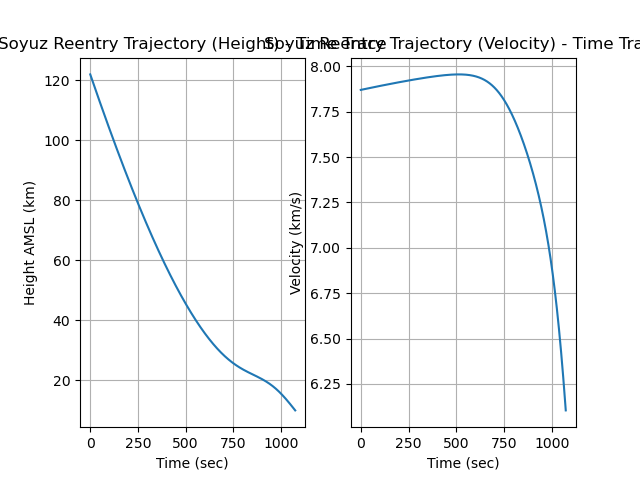

In [9]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(flight_t, flight_R)
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Height AMSL (km)')
plt.title('Soyuz Reentry Trajectory (Height) - Time Trace')
plt.subplot(1,2,2)
plt.plot(flight_t, flight_V)
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (km/s)')
plt.title('Soyuz Reentry Trajectory (Velocity) - Time Trace')